In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [3]:
wine = pd.read_csv('data\Data\white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


## EDA

We will be doing some EDA to check the target variabel distribution. The target variabel distribution is
1. (+) a good quality wine : quality > 6 (18.9%)
1. (-) a bad quality wine : quality <= 6 (81.1%)

You will find that the distribution is imbalanced with 18.9 % positive class and 81.1 % negative class. The minority class is the good quality one, we migh more interest to detect a wine with good quality than the common one.

In [4]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)
wine['label'] = np.where(wine['quality']>6,1,0)
wine['label'].value_counts(normalize=True)*100

0    81.153846
1    18.846154
Name: label, dtype: float64

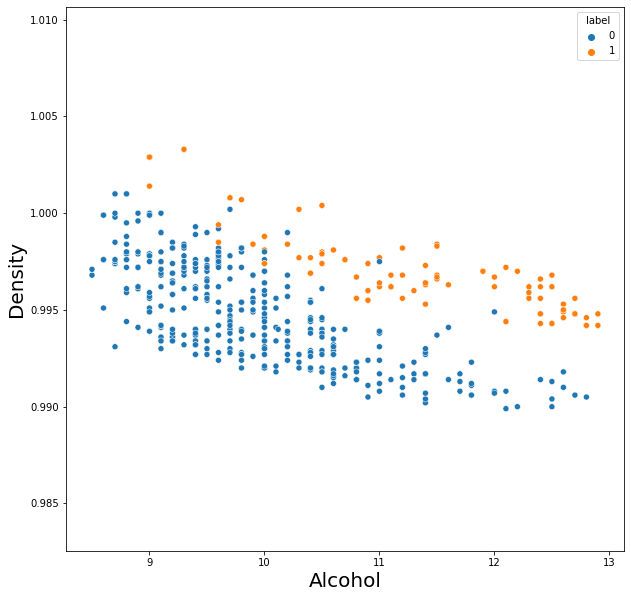

In [6]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='alcohol', y='density', data=wine, hue='label')
plt.xlabel('Alcohol', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.show()

## Data Splitting

In [7]:
X = wine[['density', 'alcohol']]
y = wine['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=2020)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((390, 2), (130, 2), (390,), (130,))

## Model 1: Tanpa Polynomial

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
y_pred = logreg.predict(X_test)
print('performance: \n', classification_report(y_test, y_pred))

performance: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



From illustration abovel, you can see the performance of the machine learning model. Let's say our concern is to these three metrics:
1. precision (+) : 0.69
1. recall (+) : 0.38
1. f1-score (+) : 0.49

<br>
next, we will do the modeling process with adding polynomial features and see the changes.

## Model 2: Dengan Polynomial

In [13]:
poly = PolynomialFeatures(degree = 3, interaction_only=False,include_bias=False) 
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [15]:
logreg_poly = LogisticRegression(max_iter = 1000)
logreg_poly.fit(X_train_poly,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
y_pred_poly = logreg_poly.predict(X_test_poly)
print('performance \n',classification_report(y_test,y_pred_poly))

performance 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       106
           1       0.95      0.88      0.91        24

    accuracy                           0.97       130
   macro avg       0.96      0.93      0.95       130
weighted avg       0.97      0.97      0.97       130



## Model 3: Resampling (RUS)

In [17]:
!pip install imblearn

In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report, f1_score
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [20]:
rus = RandomUnderSampler()
X_under, y_under = rus.fit_resample(X_train, y_train)

In [24]:
y.value_counts()

0    422
1     98
Name: label, dtype: int64

In [25]:
y_train.value_counts()

0    316
1     74
Name: label, dtype: int64

In [31]:
y_under

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
logreg_rus = LogisticRegression()
logreg_rus.fit(X_under, y_under)
y_pred_rus = logreg_rus.predict(X_test)
print(classification_report(y_test, y_pred_rus))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       106
           1       0.43      0.83      0.57        24

    accuracy                           0.77       130
   macro avg       0.69      0.79      0.71       130
weighted avg       0.86      0.77      0.79       130



In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       106
           1       0.69      0.38      0.49        24

    accuracy                           0.85       130
   macro avg       0.78      0.67      0.70       130
weighted avg       0.84      0.85      0.84       130



In [37]:
pipeline_logreg = Pipeline([
    ('polynom', PolynomialFeatures(degree=3)),
    ('clf', LogisticRegression())
])

In [38]:
from sklearn.model_selection import cross_validate, StratifiedKFold

logreg_cv = cross_validate(logreg, X_train, y_train, scoring=['precision', 'recall', 'f1'], cv = StratifiedKFold(n_splits=5),
                          n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    3.8s finished


In [39]:
logreg_cv_df = pd.DataFrame(logreg_cv)
logreg_cv_df

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.011969,0.003989,0.666667,0.571429,0.615385
1,0.107887,0.005985,0.600000,0.400000,0.480000
2,0.136808,0.009993,0.714286,0.333333,0.454545
3,0.030086,0.006980,0.571429,0.266667,0.363636
4,0.009971,0.003991,0.833333,0.333333,0.476190


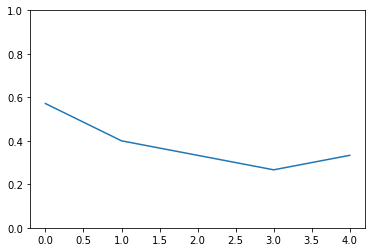

In [43]:
plt.plot(range(len(logreg_cv_df)), logreg_cv_df['test_recall'])
plt.ylim(0, 1)
plt.show()

In [44]:
print('mean:', logreg_cv_df['test_recall'].mean())
print('std:', logreg_cv_df['test_recall'].std())

mean: 0.38095238095238093
std: 0.11644780248226173


In [47]:
pipeline_logreg_rus = Pipeline([
    ('resampling', rus),
    ('clf', LogisticRegression())
])

In [48]:
logreg_cv_rus = cross_validate(pipeline_logreg_rus, X_train, y_train, scoring=['precision', 'recall', 'f1'], cv = StratifiedKFold(n_splits=5),
                          n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished


In [49]:
logreg_cv_rus = pd.DataFrame(logreg_cv_rus)
logreg_cv_rus

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.025933,0.015958,0.392857,0.785714,0.523810
1,0.032912,0.010968,0.423077,0.733333,0.536585
2,0.021939,0.014985,0.476190,0.666667,0.555556
3,0.015946,0.002992,0.454545,0.666667,0.540541
4,0.027925,0.003989,0.444444,0.533333,0.484848


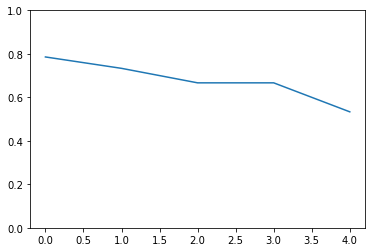

In [50]:
plt.plot(range(len(logreg_cv_rus)), logreg_cv_rus['test_recall'])
plt.ylim(0, 1)
plt.show()

In [51]:
print('mean:', logreg_cv_rus['test_recall'].mean())
print('std:', logreg_cv_rus['test_recall'].std())

mean: 0.677142857142857
std: 0.09466494201744134


## Model 4: Penalized

In [52]:
logreg_pen = LogisticRegression(class_weight='balanced')
logreg_pen.fit(X_train, y_train)
y_pred_pen = logreg_pen.predict(X_test)
print(classification_report(y_test, y_pred_pen))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       106
           1       0.43      0.83      0.57        24

    accuracy                           0.77       130
   macro avg       0.69      0.79      0.71       130
weighted avg       0.86      0.77      0.79       130



In [53]:
logreg_cv_pen = cross_validate(logreg_pen, X_train, y_train, scoring=['precision', 'recall', 'f1'], cv = StratifiedKFold(n_splits=5),
                          n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.5s finished


In [54]:
cv_pen = pd.DataFrame(logreg_cv_pen)
cv_pen

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.020947,0.008973,0.407407,0.785714,0.536585
1,0.022941,0.006979,0.423077,0.733333,0.536585
2,0.021940,0.005986,0.454545,0.666667,0.540541
3,0.009934,0.003988,0.400000,0.666667,0.500000
4,0.014961,0.005984,0.478261,0.733333,0.578947


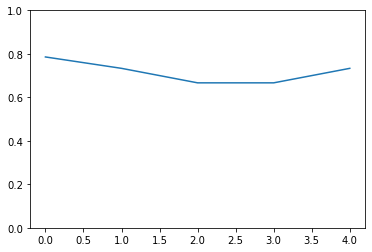

In [55]:
plt.plot(range(len(cv_pen)), cv_pen['test_recall'])
plt.ylim(0,1)
plt.show()

In [56]:
print('mean:', cv_pen['test_recall'].mean())
print('std:', cv_pen['test_recall'].std())

mean: 0.7171428571428571
std: 0.05079861086893177


## Model 5: SMOTE

In [58]:
smote = SMOTE()
logreg_smote = LogisticRegression()

logreg_smote_pipeline = Pipeline([
    ('balancing', smote),
    ('clf', logreg_smote)
])

In [60]:
logreg_cv_smote = cross_validate(logreg_smote_pipeline, X_train, y_train, scoring=['precision', 'recall', 'f1'], cv = StratifiedKFold(n_splits=5),
                          n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.9s finished


In [61]:
logreg_cv_smote

{'fit_time': array([0.38094115, 0.3819406 , 0.37196827, 0.37097692, 0.01096773]),
 'score_time': array([0.01196694, 0.00897574, 0.00797892, 0.00697255, 0.00798178]),
 'test_precision': array([0.40740741, 0.42307692, 0.45454545, 0.4       , 0.44444444]),
 'test_recall': array([0.78571429, 0.73333333, 0.66666667, 0.66666667, 0.53333333]),
 'test_f1': array([0.53658537, 0.53658537, 0.54054054, 0.5       , 0.48484848])}

In [62]:
cv_smote_df = pd.DataFrame(logreg_cv_smote)
cv_smote_df

,fit_time,score_time,test_precision,test_recall,test_f1
0,0.380941,0.011967,0.407407,0.785714,0.536585
1,0.381941,0.008976,0.423077,0.733333,0.536585
2,0.371968,0.007979,0.454545,0.666667,0.540541
3,0.370977,0.006973,0.400000,0.666667,0.500000
4,0.010968,0.007982,0.444444,0.533333,0.484848


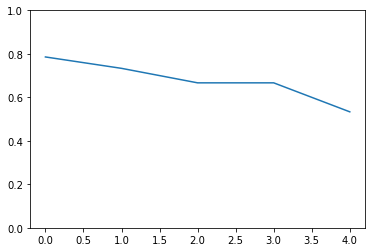

In [63]:
plt.plot(range(len(cv_smote_df)), cv_smote_df['test_recall'])
plt.ylim(0,1)
plt.show()

In [64]:
print('mean:', cv_smote_df['test_recall'].mean())
print('std:', cv_smote_df['test_recall'].std())

mean: 0.677142857142857
std: 0.09466494201744134


### SMOTE Visualization

In [70]:
normal_data = pd.concat([X,y], axis=1)
normal_data

,density,alcohol,label
0,1.0010,8.800000,0
1,0.9940,9.500000,0
2,0.9951,10.100000,0
3,0.9956,9.900000,0
4,0.9956,9.900000,0
...,...,...,...
515,0.9926,10.400000,0
516,0.9934,9.100000,0
517,0.9920,10.400000,0
518,0.9918,10.800000,0


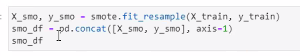

In [71]:
X_smote, y_smote = smote.fit_resample(X_train, y_train)
smote_df = pd.concat([X_smote, y_smote], axis=1)
smote_df

TypeError: cannot concatenate object of type '<class 'numpy.ndarray'>'; only Series and DataFrame objs are valid

# Combine Hyperparameter Tuning with Balancing Method

In [74]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [79]:
# make the algorithm chains
smote = SMOTE()
model =  LogisticRegression()
estimator = Pipeline([('balancing',smote),('clf',model)])

# hyperparameter space
hyperparam_space = {
    'balancing__k_neighbors':[2,5,10,15,20],
    'clf__C':[100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver':['liblinear','newton-cg']
}

# stratified cross vaidation
skf = StratifiedKFold(n_splits = 5)

# hyperparameter tuning
grid_search = GridSearchCV(
    estimator, # model to tune
    param_grid = hyperparam_space, # hyperparameter space
    cv = skf, # evaluation method
    scoring = 'f1', # metrics
    n_jobs = -1 # use all cores
)

In [80]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('balancing',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=None, ratio=None,
                                              sampling_strategy='auto',
                                              svm_estimator='deprecated')),
                                       ('clf',
                                        LogisticRegression(C=1....
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,


In [73]:
estimator.get_params()

{'memory': None,
 'steps': [('balancing',
   SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
         out_step='deprecated', random_state=None, ratio=None,
         sampling_strategy='auto', svm_estimator='deprecated')),
  ('clf',
   LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                      intercept_scaling=1, l1_ratio=None, max_iter=100,
                      multi_class='auto', n_jobs=None, penalty='l2',
                      random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                      warm_start=False))],
 'verbose': False,
 'balancing': SMOTE(k_neighbors=5, kind='deprecated', m_neighbors='deprecated', n_jobs=1,
       out_step='deprecated', random_state=None, ratio=None,
       sampling_strategy='auto', svm_estimator='deprecated'),
 'clf': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
          

In [81]:
print('best score',grid_search.best_score_)
print('best param',grid_search.best_params_)

best score 0.5810897401322532
best param {'balancing__k_neighbors': 2, 'clf__C': 100, 'clf__solver': 'newton-cg'}


In [82]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_balancing__k_neighbors,param_clf__C,param_clf__solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.069622,0.040651,0.007382,0.001017,2,100,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.536585,0.536585,0.555556,0.500000,0.594595,0.544664,0.030780,13
1,0.046080,0.007004,0.004983,0.002746,2,100,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 100, '...",0.536585,0.578947,0.571429,0.571429,0.647059,0.581090,0.036122,1
2,0.019745,0.005691,0.004590,0.001624,2,10,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.536585,0.536585,0.540541,0.500000,0.484848,0.519712,0.022835,42
3,0.033507,0.004949,0.004189,0.001934,2,10,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 10, 'c...",0.523810,0.536585,0.540541,0.500000,0.611111,0.542409,0.037153,15
4,0.020944,0.010573,0.005587,0.003489,2,1,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.523810,0.478261,0.585366,0.500000,0.578947,0.533277,0.042480,26
5,0.039494,0.008979,0.004386,0.001018,2,1,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 1, 'cl...",0.523810,0.536585,0.540541,0.540541,0.578947,0.544085,0.018482,14
6,0.016162,0.003240,0.003785,0.001173,2,0.1,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.510638,0.478261,0.521739,0.511628,0.488889,0.502231,0.016076,49
7,0.033307,0.003258,0.002999,0.001095,2,0.1,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.1, '...",0.536585,0.536585,0.540541,0.540541,0.578947,0.546640,0.016250,11
8,0.014959,0.002517,0.002989,0.000890,2,0.01,liblinear,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.304348,0.322581,0.322581,0.322581,0.322581,0.318934,0.007293,51
9,0.032511,0.007316,0.003791,0.000976,2,0.01,newton-cg,"{'balancing__k_neighbors': 2, 'clf__C': 0.01, ...",0.536585,0.536585,0.555556,0.540541,0.484848,0.530823,0.024026,28


## Model Performance Before Tuning

In [84]:
estimator.fit(X_train,y_train)
y_pred = estimator.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.84       106
           1       0.43      0.83      0.57        24

    accuracy                           0.77       130
   macro avg       0.69      0.79      0.71       130
weighted avg       0.86      0.77      0.79       130



In [86]:
grid_search.best_estimator_.fit(X_train,y_train)
y_pred = grid_search.best_estimator_.predict(X_test)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88       106
           1       0.50      0.88      0.64        24

    accuracy                           0.82       130
   macro avg       0.73      0.84      0.76       130
weighted avg       0.88      0.82      0.83       130



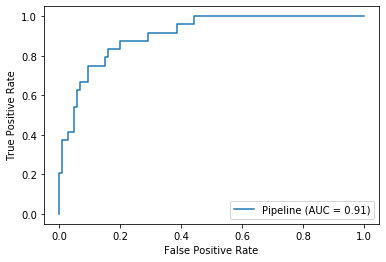

In [88]:
plot_roc_curve(grid_search.best_estimator_, X_test, y_test)